jery 1900386

In [2]:
import pandas as pd
import numpy as np 

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

    1.
    Load the data available in the file 51-data.csv.

    Find invalid values in the data and replace them either with a correct value (if possible) or with NaN.

    Replace all missing values of the purchases variable with zero.

    Use median imputation to fill in all missing values of the retention_time variable.
    (BONUS) Group the observations by sex and location before calculating the substitute median(s).

In [4]:
# read data
data_1 = pd.read_csv('51-data.csv')

In [165]:
# see what we're dealing with
data_1.head()

,sex,location,purchases,retention_time
0,female,Helsinki,7.00,57.10
1,female,Helsinki,5.00,nan
2,female,Turku,8.00,50.60
3,male,Helsinki,5.00,31.70
4,female,Helsinki,2.00,120.00


In [166]:
# find missing values
data_1.isna().sum()

sex                0
location           0
purchases          9
retention_time    23
dtype: int64

In [167]:
# Fill missing retention times with median
data_1['retention_time'] = data_1['retention_time'].fillna(data_1['retention_time'].median())

In [168]:
# succesfully filled 'em 
data_1['retention_time'].isna().sum()

0

In [169]:
# fill NaN Purchases with zero as requeseted
data_1['purchases'] = data_1['purchases'].fillna(0)

In [170]:
# it's alive!! - Frankenstein, ca. 1931
data_1.isna().sum()

sex               0
location          0
purchases         0
retention_time    0
dtype: int64

In [171]:
# it's safe to skim it manually since there's only 200 rows
grouped_data = data_1.groupby(['sex', 'location'])
for x in grouped_data:
    print(x)

(('female', '20100'),        sex location  purchases  retention_time
86  female    20100       9.00           95.00)
(('female', '33100'),         sex location  purchases  retention_time
43   female    33100       1.00           66.00
44   female    33100       3.00           12.20
45   female    33100       5.00           39.90
90   female    33100       8.00          140.90
93   female    33100       5.00            3.50
131  female    33100       3.00           64.50)
(('female', 'Helsinki'),         sex  location  purchases  retention_time
0    female  Helsinki       7.00           57.10
1    female  Helsinki       5.00           32.90
4    female  Helsinki       2.00          120.00
6    female  Helsinki       2.00          122.20
9    female  Helsinki       5.00          101.10
16   female  Helsinki       6.00           59.40
20   female  Helsinki       3.00            6.50
34   female  Helsinki       6.00           87.00
36   female  Helsinki       3.00           47.40
53   fema

Apparently some city values are encoded by their respective area codes and male is nale. Let's fix that

In [172]:
data_1.loc[data_1['location'] == 33100, 'location'] = 'Tampere'
data_1.loc[data_1['location'] == 20100, 'location'] = 'Turku'
data_1.loc[data_1['location'] == '33100', 'location'] = 'Tampere'
data_1.loc[data_1['location'] == '20100', 'location'] = 'Turku'
data_1.loc[data_1['sex'] == 'nale', 'sex'] = 'male'

In [173]:
data_1.groupby(['sex', 'location']).median()

purchases  retention_time
sex    location                           
female Helsinki       5.00           45.90
       Tampere        5.00           16.80
       Turku          5.00           32.90
male   Helsinki       5.00           32.90
       Tampere        4.00           45.00
       Turku          4.00           28.10

    Load the data available in the file 53-data.csv, which contains daily numbers of cyclists spotted on selected streets.

    For each weekday (Monday - Sunday), calculate the mean daily number of cyclists for each street. Plot the means as a bar plot.

    For each month (January - December), calculate the mean daily number of cyclists for each street. Plot the means as a bar plot.

    Calculate the Spearman's correlation coefficient and create a scatter plot for each pair of streets.

    What information do these plots reveal?

In [174]:
data_3 = pd.read_csv('53-data.csv')

In [175]:
data_3.isna().sum()

Eteläesplanadi     0
Kaivokatu          0
Kuusisaarentie     0
Merikannontie      0
Länsituulenkuja    0
year               0
month              0
day                0
weekday            0
dtype: int64

In [176]:
data_3.head()

,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja,year,month,day,weekday
0,999,1608,699,1287,646,2017,11,10,4
1,328,377,110,266,267,2017,11,11,5
2,316,474,252,564,228,2017,11,12,6
3,1149,1753,888,1537,730,2017,11,13,0
4,1246,1825,812,1505,787,2017,11,14,1


In [177]:
weekday_data = data_3.drop(columns = ['year', 'month', 'day'])

In [178]:
weekday_data.groupby(['weekday']).mean()

,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja
weekday,,,,,
0,"1,226.75","2,379.02","1,226.71","1,939.71","1,107.78"
1,"1,280.68","2,454.70","1,237.83","2,001.72","1,092.74"
2,"1,291.27","2,486.91","1,212.19","1,965.70","1,093.91"
3,"1,265.63","2,451.12","1,153.93","1,891.72","1,077.50"
4,"1,129.94","2,199.50",976.36,"1,613.91","1,031.50"
5,773.02,"1,434.66",659.73,"1,225.36",824.58
6,658.16,"1,259.18",782.76,"1,349.11",680.36


In [179]:
monthly_data = data_3.drop(columns = ['year','day','weekday'])

In [180]:
monthly_data.groupby(['month']).mean()

,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja
month,,,,,
1,264.61,580.18,295.36,469.43,468.35
2,203.58,548.17,287.19,407.61,433.85
3,310.86,781.59,455.05,646.56,608.61
4,"1,067.61","2,010.75","1,157.62","1,819.67",956.93
5,"1,881.64","3,249.58","1,728.73","2,969.60","1,292.04"
6,"2,246.46","3,752.10","2,013.76","3,437.76","1,691.71"
7,"1,512.07","3,410.94","1,563.34","2,885.59","1,268.85"
8,"2,095.73","4,152.60","2,010.89","3,152.58","1,532.34"
9,"1,681.79","3,351.07","1,545.97","2,368.98","1,373.31"


<AxesSubplot:xlabel='month'>

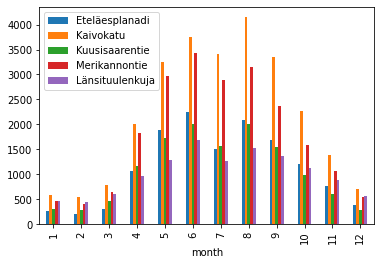

In [181]:
monthly_data.groupby(['month']).mean().plot.bar()

<AxesSubplot:xlabel='weekday'>

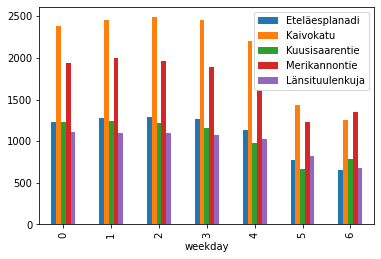

In [182]:
weekday_data.groupby(['weekday']).mean().plot.bar()


    An advertisement company followed online customers to discover how effectively advertisements lure them to spend money. The data files 54-image.csv and 54-video.csv contain information on how much customers spent in total after clicking on advertisements.

    Is there statistical evidence to claim that the total amount spent by customers is different if they click on image advertisements than on video advertisements?

In [19]:
img_data = pd.read_csv('54-image.csv')
vid_data = pd.read_csv('54-video.csv')

In [24]:
print(len(img_data))
print(len(vid_data))

195
175


In [29]:
total_data = pd.merge(img_data, vid_data, on = 'person_id', how = 'outer')
len(total_data)

199

In [184]:
img_data.isna().sum()

person_id       0
amount_spent    0
dtype: int64

In [185]:
vid_data.isna().sum()

person_id       0
amount_spent    0
dtype: int64

In [186]:
vid_data['amount_spent'].describe()

count   175.00
mean     43.62
std      42.17
min       0.18
25%      14.32
50%      31.99
75%      59.72
max     214.34
Name: amount_spent, dtype: float64

In [187]:
img_data['amount_spent'].describe()

count   195.00
mean     50.47
std      47.40
min       0.92
25%      17.99
50%      36.57
75%      71.58
max     329.23
Name: amount_spent, dtype: float64

There'd be some suggestions that people spent, on average, more time on image ads